In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

np.random.seed(0)

In [2]:
X, y = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=2,
    cluster_std=1.2,
    random_state=42
)

Y = np.eye(5)[y]

train_size = 800
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]
y_test_true = y[train_size:]

In [3]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        self.lr = 0.01

        self.W1 = np.random.randn(2, 20) * 0.1
        self.W2 = np.random.randn(20, 15) * 0.1
        self.W3 = np.random.randn(15, 10) * 0.1
        self.W4 = np.random.randn(10, 5) * 0.1

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)
        self.A4 = softmax(self.Z4)

        return self.A4

    def backPropagation(self, X, Y, pred):
        output_error = pred - Y

        dW4 = np.dot(self.A3.T, output_error)

        hidden3_error = output_error.dot(self.W4.T)
        dW3 = np.dot(self.A2.T, hidden3_error * self.sigmoid(self.A3, der=True))

        hidden2_error = (hidden3_error * self.sigmoid(self.A3, der=True)).dot(self.W3.T)
        dW2 = np.dot(self.A1.T, hidden2_error * self.sigmoid(self.A2, der=True))

        hidden1_error = (hidden2_error * self.sigmoid(self.A2, der=True)).dot(self.W2.T)
        dW1 = np.dot(X.T, hidden1_error * self.sigmoid(self.A1, der=True))

        self.W4 -= self.lr * dW4
        self.W3 -= self.lr * dW3
        self.W2 -= self.lr * dW2
        self.W1 -= self.lr * dW1

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)
        return cross_entropy(Y, pred)

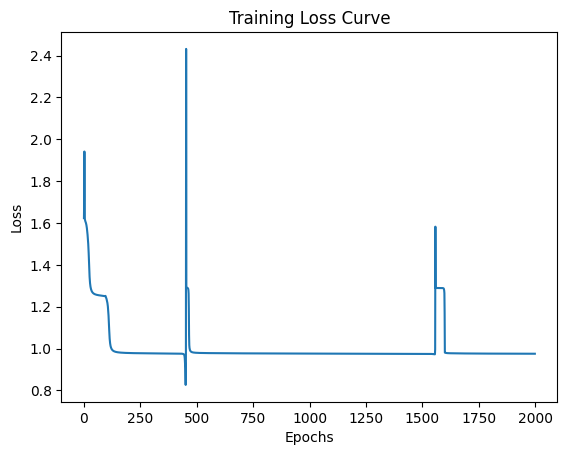

In [6]:
NN = NeuralNetwork()
losses = []

for epoch in range(2000):
    loss = NN.train(X_train, Y_train)
    losses.append(loss)

plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
pred_test = NN.feedForward(X_test)
y_pred = np.argmax(pred_test, axis=1)

acc = accuracy_score(y_test_true, y_pred)
print("\nAccuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test_true, y_pred))



Accuracy: 0.415

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00        37
           2       0.28      1.00      0.43        41
           3       0.82      1.00      0.90        42
           4       0.00      0.00      0.00        42

    accuracy                           0.41       200
   macro avg       0.22      0.40      0.27       200
weighted avg       0.23      0.41      0.28       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


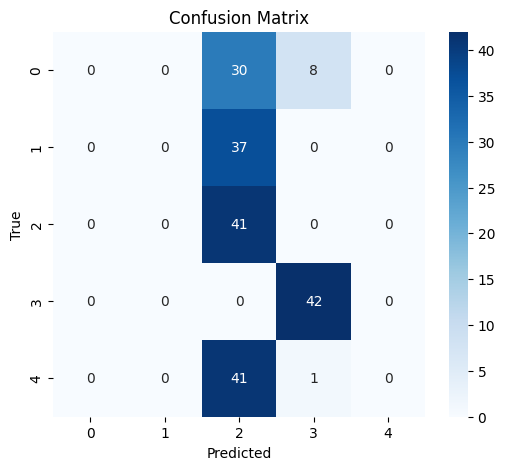

In [8]:
cm = confusion_matrix(y_test_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()